In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as la
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings as wr
import random

In [2]:
import sys
!{sys.executable} -m pip install scipy

In [3]:
import scipy.io

In [4]:
def dataset_arrange(data_file):
    if data_file[-3:] == 'mat':
        load_file = scipy.io.loadmat(data_file)
        p = pd.Series(load_file)
        rows = load_file['hwyrows'][0][0]
        cols = load_file['hwycols'][0][0]
        data = load_file['hwydata']
        states = []
        headers = []
        for i in range(rows):
            states.append(load_file['statelabel'][i][0][0])
        for j in range(cols):
            headers.append(load_file['hwyheaders'][0][j][0])
        dict_1 = {}
        l_2 = []
        for i in range(cols):
            l_1 = []
            for j in range(rows):
                l_1.append(data[j][i])
            l_2.append(l_1)
        for i in range(cols):
            dict_1[headers[i]] = l_2[i]
        data_df = pd.DataFrame(dict_1)
        states_df = pd.DataFrame({'states': states})
        total_frame = [states_df,data_df]
        total_df = pd.concat(total_frame,axis = 1,join ="inner")
        
    elif data_file[-3:] == 'csv':
        load_file = pd.read_csv(data_file)
        total_df = load_file
    elif data_file[-3:] == 'xlsx':
        load_file = pd.read_excel(data_file)
        total_df = load_file
    return total_df

In [5]:
total_df = dataset_arrange('Matlab_accidents.mat')
total_df.head()

,states,Census ID,Centroid Longitude,Centroid Latitude,Traffic fatalities,Licensed drivers (thousands),Registered vehicles (thousands),Vehicle-miles traveled (millions),Miles traveled per vehicle,Fatalities per 100K licensed drivers,Fatalities per 100K registered vehicles,Fatalities per 100M vehicle-miles traveled,Fatalities involving high blood alcohol,Percent Alcohol-Related,Total Population,Urban Population,Rural Population,Pct Urban Population
0,Wyoming,56.0,-107.555625,43.032664,164.0,380.180,671.529,9261.0,13790.915954,43.137461,24.421879,1.770867,54.0,32.926829,493782.0,322073.0,171709.0,65.225747
1,District of Columbia,11.0,-77.026928,38.892064,43.0,349.122,240.403,3742.0,15565.529548,12.316611,17.886632,1.149118,12.0,27.906977,572059.0,572059.0,0.0,100.000000
2,Vermont,50.0,-72.556496,44.043498,98.0,550.462,551.516,7855.0,14242.560506,17.803227,17.769203,1.247613,20.0,20.408163,608827.0,232550.0,376277.0,38.196401
3,Alaska,2.0,-152.459342,64.609656,101.0,482.532,681.115,4990.0,7326.222444,20.931254,14.828627,2.024048,30.0,29.702970,626932.0,411955.0,214977.0,65.709678
4,North Dakota,38.0,-99.499793,47.469117,100.0,461.780,721.835,7594.0,10520.409789,21.655334,13.853581,1.316829,35.0,35.000000,642200.0,358394.0,283806.0,55.807225


In [6]:
# Function for shuffling and splitting the data into training and testing (Single independent variable)

In [7]:
def BT20ECE097_split_1(total_df,ratio):
    output = []
    total_df = total_df.sample(frac = 1,random_state = 30) 
    X = np.array(total_df['Licensed drivers (thousands)'])
    Y = np.array(total_df['Fatalities per 100K licensed drivers'])
    full_train = math.floor(ratio * X.shape[0])
    full_test = math.ceil((1-ratio) * X.shape[0])
    X_train = X[:full_train]
    Y_train = Y[:full_train]
    X_test = X[full_train:]
    Y_test = Y[full_train:]
    output = [X_train,Y_train,X_test,Y_test]
    return output

In [8]:
list_data_1 = []
list_data_1 = BT20ECE097_split_1(total_df,0.7)
# print(list_data_1[0])

In [9]:
# function for pseudo inverse method of Linear Regression (Single independent variable)

In [10]:
def BT20ECE097_LR_PI_1(data):
    X = data[0][np.newaxis]
    o = np.ones(len(data[0]))
    Z = np.hstack((X.T, np.atleast_2d(o).T))
    Y = data[1]
    Zpi = la.pinv(Z)
    W = np.matmul(Zpi,Y.T)
    return W

In [11]:
weights_1 = BT20ECE097_LR_PI_1(list_data_1)
print("Weights found for pseudo inverse method by taking single independent variable are ",weights_1)

Weights found for pseudo inverse method by taking single independent variable are  [-8.75849931e-04  2.68491362e+01]


In [12]:
def err_func(Y,Y_p,data):
    wr.filterwarnings('ignore')
    err = np.square(np.subtract(Y,Y_p)).mean()
    return err

In [13]:
def predict_Y_1(data,W):
    X = data[2][np.newaxis]
    o = np.ones(len(data[2]))
    Z = np.hstack((X.T, np.atleast_2d(o).T))
    Y_p = np.dot(Z,W)
    return Y_p    

In [14]:
e1 = err_func(list_data_1[3],predict_Y_1(list_data_1,weights_1),list_data_1)

In [15]:
print("Testing error found for pseudo inverse method by taking single independent variable is ",e1)

Testing error found for pseudo inverse method by taking single independent variable is  59.83634206947459


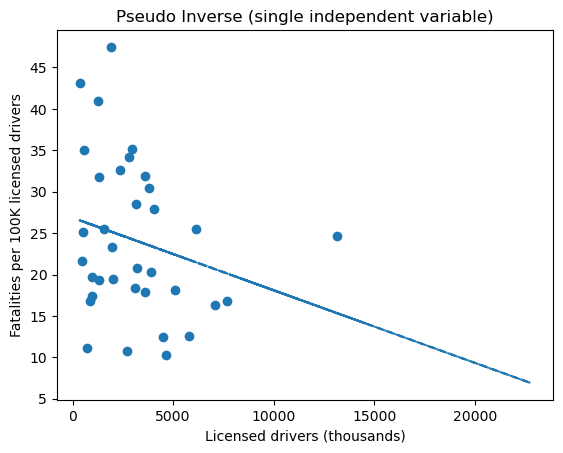

In [20]:
plt.scatter(list_data_1[0],list_data_1[1])
plt.plot(list_data_1[2],predict_Y_1(list_data_1,weights_1),'--')
plt.xlabel("Licensed drivers (thousands)")
plt.ylabel("Fatalities per 100K licensed drivers")
plt.title("Pseudo Inverse (single independent variable)")
plt.show()

In [21]:
def BT20ECE097_split_2(total_df,ratio):
    output = []
    total_df = total_df.sample(frac = 1,random_state = 30) 
    X = np.array(total_df.loc[:, ['Miles traveled per vehicle','Licensed drivers (thousands)','Registered vehicles (thousands)']])
    Y = np.array(total_df['Fatalities involving high blood alcohol'])
    full_train = math.floor(ratio * X.shape[0])
    full_test = math.ceil((1-ratio) * X.shape[0])
    X_train = X[:full_train]
    Y_train = Y[:full_train]
    X_test = X[full_train:]
    Y_test = Y[full_train:]
    output = [X_train,Y_train,X_test,Y_test]
    return output

In [22]:
list_data_2 = []
list_data_2 = BT20ECE097_split_2(total_df,0.7)
# print(list_data_2[0])

In [23]:
# Function using gradient descent for single independent variable 

In [24]:
def BT20ECE097_LR_GD_1(data,n,runs):
    m = 0.1
    c = 0.01
    merr = 1e-10
    d = float(len(data[0]))
    X = data[0][np.newaxis]
    Y = data[1][np.newaxis]
    p_err = None
    err = []
    w = []
    for i in range(runs):
        Y_p = m*X + c
        c_err = err_func(Y,Y_p,data)
        if p_err and abs(p_err-c_err)<=merr:
            break
        p_err = c_err
        err.append(c_err)
        w.append(m)
        dm = (-2/d) * np.sum(np.dot(X.T,(Y-Y_p)))
        dc = (-2/d) * np.sum(Y - Y_p)
        m = m - n * dm 
        c = c - n * dc
    print("Test error using gradient descent algorithm for single independent variable is ",err[-1])
    return [m,c,Y_p]

In [25]:
result_1 = BT20ECE097_LR_GD_1(list_data_1,5e-10,10000)
print("m = ",result_1[0])
print("c = ",result_1[1])

Test error using gradient descent algorithm for single independent variable is  557.2117721099448
m =  0.00765003441869854
c =  0.009999161815582174


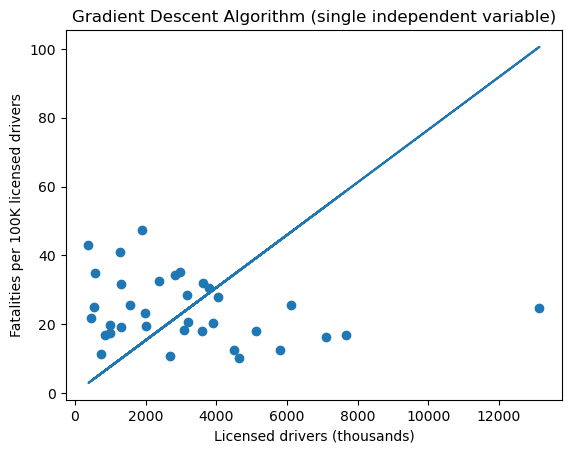

In [29]:
plt.scatter(list_data_1[0],list_data_1[1])
plt.plot(list_data_1[0],result_1[2].T)
plt.xlabel("Licensed drivers (thousands)")
plt.ylabel("Fatalities per 100K licensed drivers")
plt.title("Gradient Descent Algorithm (single independent variable)")
plt.show()

In [60]:
# function for pseudo inverse method of Linear Regression (Multiple independent variables)

In [61]:
def BT20ECE097_LR_PI_2(data):
    o = np.ones(len(data[0]))
    Z = np.hstack((data[0], np.atleast_2d(o).T))
    Y = data[1]
    Zpi = la.pinv(Z)
    W = np.matmul(Zpi,np.transpose(data[1]))
    return W

In [62]:
weights_2 = BT20ECE097_LR_PI_2(list_data_2)
print("Weights found for pseudo inverse method by taking multiple independent variables are ",weights_2)

Weights found for pseudo inverse method by taking multiple independent variables are  [ 1.92901484e-02  4.42810607e-02  1.90290646e-02 -2.23382855e+02]


In [63]:
def predict_Y_2(data,W):
    o = np.ones(len(data[2]))
    Z = np.hstack((data[2], np.atleast_2d(o).T))
    Y_p = np.dot(Z,W)
    return Y_p    

In [64]:
e2 = err_func(list_data_2[3],predict_Y_2(list_data_2,weights_2),list_data_2)
print("Testing error found for pseudo inverse method by taking multiple independent variables is ",e2)

Testing error found for pseudo inverse method by taking multiple independent variables is  20019.936951848656


In [65]:
# Function using gradient descent for multiple independent variables

In [72]:
def BT20ECE097_LR_GD_2(data,n,runs):
    X = data[0].T
    Y = data[1]
    m = np.full(len(X),0.1)
    c = 0.01
    merr = 1e-10
    d = float(len(data[1]))
    p_err = None
    err = []
    for i in range(runs):
        a = np.matmul(m,X) 
        Y_p = a+c
        c_err = err_func(Y,Y_p,data)
        if p_err and abs(p_err-c_err)<=merr:
            break
        p_err = c_err
        err.append(c_err)
        dm = (-2/d) * np.matmul(X,(Y-Y_p))
        dc = (-2/d) * np.sum(Y - Y_p)
        m = np.subtract(m,n * dm)
        c = c-(n * dc)
    print("Test error using gradient descent algorithm for multiple independent variable is ",err[-1])
    return [m,c,Y_p,err]

In [73]:
result_2 = BT20ECE097_LR_GD_2(list_data_2,5e-10,1000000)
print("m = ",result_2[0])
print("c = ",result_2[1])

Test error using gradient descent algorithm for multiple independent variable is  7071.764942539254
m =  [ 0.00308559  0.10020281 -0.03014224]
c =  0.004285034372348597


In [68]:
# Linear Regression using Inbuilt Functions 


# X = np.array(total_df.loc[:, ['Miles traveled per vehicle','Licensed drivers (thousands)','Registered vehicles (thousands)']])
# Y = np.array(total_df['Fatalities involving high blood alcohol'])
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)
# frame_clf = LinearRegression()
# frame_clf.fit(X_train,Y_train)
# result = frame_clf.predict(X_test)
# print(result)
# frame_clf.score(X_test,Y_test)